<h1>Princeton Room Draw Statistics</h1>
A selection of the code used in writing The Daily Princetonian's 2022 <a href ="https://www.dailyprincetonian.com/article/2022/04/room-draw-data-princeton-housing-construction-hres-residential-college">room draw piece</a>. Not all code and outputs are included for student privacy reasons

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os as os

<h3>Convert PDFs to csvs</h3>

In [ ]:
import tabula
pdfs = os.listdir("draw_times")
 
for pdf in pdfs:
     output = "draw_times_csv/" + pdf + ".csv"
     tabula.convert_into("draw_times/" + pdf, output, output_format="csv", pages='all')

<h3>Read in room information and merge with how desirable it was in last year's draw</h3>

In [4]:
times = pd.read_csv("draw_time.csv")
info = pd.read_csv("room_info.csv")
df = pd.merge(times, info, on='room_id')
df


,room_id,year,draw_time,buiding,room_no,occupancy,sq_footage,res_college,taken
0,1441,2019,1,SPELMAN,54,4.0,930.0,Upperclass,f
1,1441,2017,17,SPELMAN,54,4.0,930.0,Upperclass,f
2,1422,2019,2,SPELMAN,23,4.0,930.0,Upperclass,f
3,1422,2017,16,SPELMAN,23,4.0,930.0,Upperclass,f
4,1463,2019,3,SPELMAN,86,4.0,930.0,Upperclass,f
...,...,...,...,...,...,...,...,...,...
3156,1015,2017,1585,LAUGHLIN,625,3.0,395.0,Upperclass,f
3157,1022,2017,1586,LITTLE,93,4.0,508.0,Upperclass,f
3158,1019,2017,1587,LAUGHLIN,632,4.0,621.0,Upperclass,f
3159,998,2017,1588,LAUGHLIN,521,3.0,440.0,Upperclass,f


<h3>Join information across all draws</h3>

In [ ]:

butler = pd.read_csv("draw_times_csv/ButlerTimeOrder2022.pdf.csv",header = None)
butler['draw'] = "butler"

nce = pd.read_csv("draw_times_csv/NCEDrawOrder2022.pdf.csv",header = None)
nce['draw'] = "nce"

forbes = pd.read_csv("draw_times_csv/ForbesDrawOrder2022.pdf.csv",header = None)
forbes['draw'] = "forbes"

rocky = pd.read_csv("draw_times_csv/RockyDrawOrder2022.pdf.csv",header = None)
rocky['draw'] = "rocky"

whitman = pd.read_csv("draw_times_csv/WhitmanDrawOrder2022.pdf.csv",header = None)
whitman['draw'] = "whitman"

upperclass = pd.read_csv("draw_times_csv/UpperclassDrawOrder2022.pdf.csv",header = None)
upperclass['draw'] = "upperclass"

mathey = pd.read_csv("draw_times_csv/MatheyDrawOrder2022.pdf.csv",header = None)
mathey['draw'] = "mathey"

ind = pd.read_csv("draw_times_csv/IndependentTimeOrder2022.pdf.csv",header = None)
ind['draw'] = "ind"

ncw =  pd.read_csv("draw_times_csv/NCWDrawOrder2022.pdf.csv",header = None)
ncw['draw'] = "ncw"

spelman = pd.read_csv("draw_times_csv/SpelmanTimeOrder2022.pdf.csv",header = None)
spelman['draw'] = "spellman"

dfs = [butler, nce, forbes, rocky, whitman, upperclass, mathey, ind, ncw, spelman]

df = pd.concat(dfs)

df.columns = ['puid', 'year', 'last_name', 'first_name', 'time', 'draw']


<h3>Find class breakdown in each draw</h3>

In [ ]:

breakdown = df[['year', 'draw']]
breakdown['count'] = 1
breakdown.groupby(by = ['year', 'draw']).sum().reset_index()

<h3>Find capacity of each dorm</h3>

In [8]:
rooms = pd.read_csv("AvailableRoomsList2022.csv")
rooms['capacity'] = 0
rooms.loc[rooms.unit_type == 'SINGLE', 'capacity'] = 1
rooms.loc[rooms.unit_type == 'DA', 'capacity'] = 1
rooms.loc[rooms.unit_type == 'DOUBLE', 'capacity'] = 2
rooms.loc[rooms.unit_type == 'TRIPLE', 'capacity'] = 3
rooms.loc[rooms.unit_type == 'QUAD', 'capacity'] = 4
rooms.loc[rooms.unit_type == 'QUINT', 'capacity'] = 5
rooms.loc[rooms.unit_type == '6PERSON', 'capacity'] = 6
rooms.to_csv("rooms_with_cap.csv", index=False)

rooms.shape

(1968, 8)

In [30]:
rooms_cap = rooms[['capacity', 'affiliation', 'dorm']]
rooms_cap.groupby(by = ['affiliation','dorm']).sum().reset_index()

,affiliation,capacity
0,Butler College,266
1,Forbes College,213
2,Mathey College,271
3,New College East,267
4,New College West,300
5,Rockefeller College,237
6,Upperclass,1830
7,Whitman College,325


<h3>Find average group size in each draw</h3>

In [51]:
summed = []
for draw in dfs:
    summed_draw = draw.copy()
    summed_draw.columns = ['puid', 'year', 'last_name', 'first_name', 'time', 'draw']
    summed_draw['group_size'] = 1
    summed_draw = summed_draw[['time', 'draw', 'group_size']]
    summed_draw = summed_draw.groupby(by = ['time', 'draw']).sum().reset_index()
    summed_draw = summed_draw[['draw', 'group_size']]
    summed.append(summed_draw)

all_draws_group_size = pd.concat(summed).reset_index()
all_draws_group_size.to_csv("all_draws_group_size.csv")
all_draws_group_size.groupby(by = "draw").mean().reset_index()


,draw,index,group_size
0,butler,325.5,2.335890
1,forbes,150.0,2.066445
2,ind,83.5,2.029762
3,mathey,235.5,2.387712
4,nce,302.0,2.358678
5,ncw,327.0,2.363359
6,rocky,232.5,2.358369
7,spellman,25.0,4.235294
8,upperclass,392.0,2.670064
9,whitman,319.5,2.368750


In [54]:
all_draws_group_size.groupby('group_size')['index'].nunique()

group_size
1    690
2    515
3    303
4    479
5    146
6    151
7     83
8     99
Name: index, dtype: int64

<h3>Find average number of draws each student participated in</h3>

In [ ]:
number_of_draws = df[['puid', 'year', 'draw']]
number_of_draws['count'] = 1
number_of_draws_agg = number_of_draws.groupby(by = ['puid', 'year']).sum().reset_index()
number_of_draws_agg.groupby(by = ['year']).mean()


In [55]:
number_of_draws_agg_2023 = number_of_draws_agg[number_of_draws_agg['year'] == 2023]
number_of_draws_agg_2023.groupby('dummy')['puid'].nunique().to_csv("2023_num_draws.csv")
number_of_draws_agg_2023.groupby('dummy')['puid'].nunique()

sum(number_of_draws_agg_2023.groupby('dummy')['puid'].nunique())
# sns.histplot(data=number_of_draws_agg_2023, x="dummy")

1036

<h3>Is there a relationship between draw times across multiple draws</h3>

/Users/anikamaskara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anikamaskara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,perc_x,perc_y
perc_x,1.000000,0.519318
perc_y,0.519318,1.000000


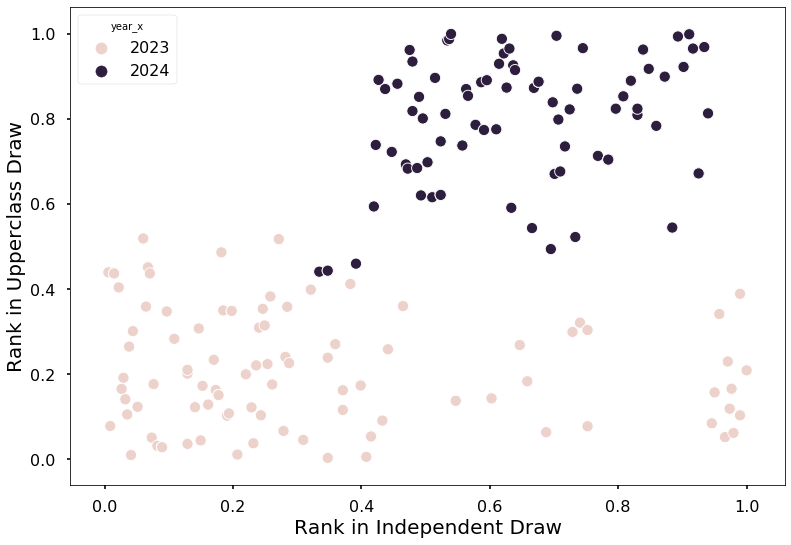

In [36]:
nce_perc = df[df['draw'] == 'ind']
nce_perc['perc'] = nce_perc['time'].rank(pct = True)
nce_perc

upper_perc = df[df['draw'] == 'upperclass']
upper_perc['perc'] = upper_perc['time'].rank(pct = True)
upper_perc

joined = pd.merge(nce_perc,upper_perc,on='puid')
p = sns.scatterplot(data = joined, x = "perc_x", y = "perc_y", hue = "year_x")
p.set_xlabel("Rank in Independent Draw", fontsize = 20)
p.set_ylabel("Rank in Upperclass Draw", fontsize = 20)

test = joined[['perc_x', 'perc_y']]
test.corr()



<h3>Is there a relationship between draw times this year and last year</h3>

In [ ]:
upperclass19 = df[df['draw'] == 'upperclass']
upperclass18 =  df[df['draw'] == 'ind']
indep19 =  df[df['draw'] == 'nce']

# We order groups.
upper19_groups_ordered = upperclass19["time"].unique()
upper18_groups_ordered = upperclass18["time"].unique()
indep19_groups_ordered = indep19["time"].unique()

# The score is the percentile rank (between 0-1) of all draw groups. Lower is better.
upperclass19["Score"] = upperclass19["time"].apply(lambda x: np.where(upper19_groups_ordered == x)[0][0]) + 1
upperclass19["Score"] = upperclass19["Score"] / len(upper19_groups_ordered)

upperclass18["Score"] = upperclass18["time"].apply(lambda x: np.where(upper18_groups_ordered == x)[0][0]) + 1
upperclass18["Score"] = upperclass18["Score"] / len(upper18_groups_ordered)

indep19["Score"] = indep19["time"].apply(lambda x: np.where(indep19_groups_ordered == x)[0][0]) + 1
indep19["Score"] = indep19["Score"] / len(indep19_groups_ordered)

In [11]:
u19_groups = pd.DataFrame(upper19_groups_ordered, columns = ["time"])
u18_groups = pd.DataFrame(upper18_groups_ordered, columns = ["time"])
i19_groups = pd.DataFrame(indep19_groups_ordered, columns = ["time"])

# Calculate number of students and each group, and get their score.
u19_groups["n_Students"] = u19_groups["time"].apply(lambda x: np.sum(upperclass19["time"] == x))
u19_groups["Score"] = u19_groups.index / len(u19_groups)

u18_groups["n_Students"] = u18_groups["time"].apply(lambda x: np.sum(upperclass18["time"] == x))
u18_groups["Score"] = u18_groups.index / len(u18_groups)

i19_groups["n_Students"] = i19_groups["time"].apply(lambda x: np.sum(indep19["time"] == x))
i19_groups["Score"] = i19_groups.index / len(u18_groups)

# Calculate number of seniors and juniors.
u19_groups["n_Seniors"] = u19_groups["time"].apply(lambda x: np.sum(upperclass19[upperclass19["year"] == 2023]["time"] == x))
u19_groups["n_Juniors"] = u19_groups["time"].apply(lambda x: np.sum(upperclass19[upperclass19["year"] == 2024]["time"] == x))

u18_groups["n_Seniors"] = u18_groups["time"].apply(lambda x: np.sum(upperclass18[upperclass18["year"] == 2023]["time"] == x))
u18_groups["n_Juniors"] = u18_groups["time"].apply(lambda x: np.sum(upperclass18[upperclass18["year"] == 2024]["time"] == x))

i19_groups["n_Seniors"] = i19_groups["time"].apply(lambda x: np.sum(indep19[indep19["year"] == 2023]["time"] == x))
i19_groups["n_Juniors"] = i19_groups["time"].apply(lambda x: np.sum(indep19[indep19["year"] == 2024]["time"] == x))

In [12]:
u19_groups_seniorsonly = u19_groups[u19_groups["n_Juniors"] == 0]
u18_groups_seniorsonly = u18_groups[u18_groups["n_Juniors"] == 0]
i19_groups_seniorsonly = i19_groups[i19_groups["n_Juniors"] == 0]

u19_groups_juniorsonly = u19_groups[u19_groups["n_Seniors"] == 0]
u18_groups_juniorsonly = u18_groups[u18_groups["n_Seniors"] == 0]
i19_groups_juniorsonly = i19_groups[i19_groups["n_Seniors"] == 0]

In [14]:
# Merge Upperclass draws from 2018-2019 and 2019-2020 based on students in both groups
upper_18_19 = upperclass18.merge(upperclass19, on='puid', how='inner')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.style.use('seaborn-poster')
plt.scatter(upper_18_19["Score_x"], upper_18_19["Score_y"], c = upper_18_19["year_x"] )
plt.title("Students in both 2018-2019/2019-2020 Upperclass Draw")
plt.xlabel("Position in 2018-2019 (lower is better)")
plt.ylabel("Position in 2019-2020 (lower is better)")
plt.show()